In [1]:
import numpy as np
from tensorflow import keras

In [2]:
import tensorflow_hub as hub
mobile_model="https://tfhub.dev/google/imagenet/mobilenet_v2_100_128/feature_vector/5"
pretrained_model_without_top_layer=hub.KerasLayer(mobile_model,input_shape=(128,128,3),trainable=False)

Loading our data

In [3]:
npzfile=np.load('Preprocessed_data.npz')

In [4]:
npzfile.files
X=npzfile['arr_0']
Y=npzfile['arr_1']

In [5]:
X=X/255

Splitting the data

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

Augmenting the data

In [8]:
data_augmentation=keras.Sequential([
  keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(128,128,3)),
  keras.layers.experimental.preprocessing.RandomRotation(0.1) ,
  keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

Model creation and training

In [9]:
model=keras.Sequential([
                data_augmentation,
                pretrained_model_without_top_layer,
                keras.layers.Dropout(0.5),
                keras.layers.Dense(6,activation='softmax')
])

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(x_train,y_train,epochs=100)

Epoch 1/100
15/15 [==============================] - 9s 62ms/step - loss: 2.0382 - accuracy: 0.3187
Epoch 2/100
15/15 [==============================] - 0s 27ms/step - loss: 0.8409 - accuracy: 0.6876
Epoch 3/100
15/15 [==============================] - 0s 28ms/step - loss: 0.4620 - accuracy: 0.8574
Epoch 4/100
15/15 [==============================] - 0s 28ms/step - loss: 0.2933 - accuracy: 0.9078
Epoch 5/100
15/15 [==============================] - 0s 28ms/step - loss: 0.2251 - accuracy: 0.9182
Epoch 6/100
15/15 [==============================] - 0s 27ms/step - loss: 0.1888 - accuracy: 0.9434
Epoch 7/100
15/15 [==============================] - 0s 26ms/step - loss: 0.1526 - accuracy: 0.9623
Epoch 8/100
15/15 [==============================] - 0s 27ms/step - loss: 0.1404 - accuracy: 0.9497
Epoch 9/100
15/15 [==============================] - 0s 26ms/step - loss: 0.1470 - accuracy: 0.9560
Epoch 10/100
15/15 [==============================] - 0s 26ms/step - loss: 0.1029 - accuracy: 0.9727

Plotting loss and accuracy curve


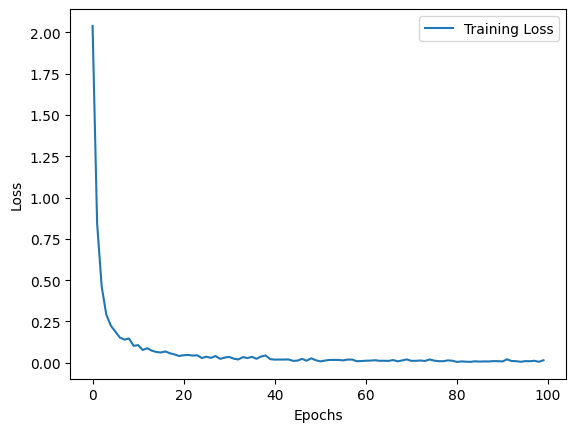

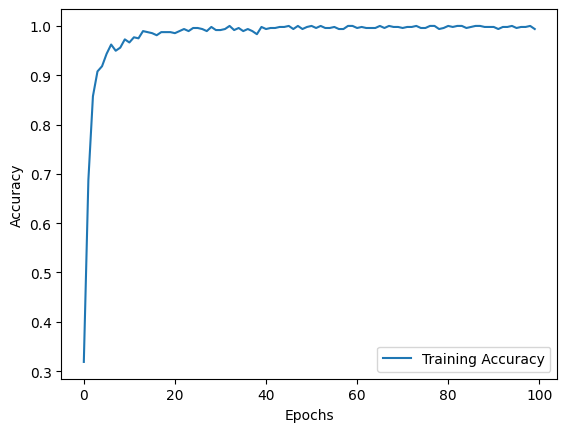

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model Testing

In [13]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 1s 171ms/step - loss: 0.0308 - accuracy: 0.9833


[0.030753012746572495, 0.9833333492279053]

Saving our model

In [37]:
model.save('MobileModel.h5')